# Learning outcomes
- Method to quantize / measure the image segmentation model: Intersection over Union (IOU)
- Image gradients associate closelt with edges. Edge detections
    * sobel
    * scharr
    * laplician
    * canny
- Contour detection ('cv.findContour()')
- Contour features (bounding box, perimeter, area, centroid) as well as properties (aspect ratio, ciscularity, solidity and extent)
- Bulid-in method for blob detection
    - blob is a connected components in an image with similar brightness of intensity value

In [1]:
import sys
assert sys.version_info >= (3, 7)
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt
from util_func import *

# IOU

In [2]:
def computeIOU(boxA, boxB):
    """Args:
    boxA: ground truth
    boxB: prediction  They are list of points"""
    x_start = max(boxA[0], boxB[0])
    y_start = max(boxA[1], boxB[1])
    x_end = min(boxA[2], boxB[2])
    y_end = min(boxA[3], boxB[3])
    
    # compute intersection area
    interArea = max(0, x_end - x_start + 1) * max(0, y_end - y_start + 1)
    
    #area of box A and box B
    areaA = (boxA[2] - boxA[0] + 1) * (boxA[3] - boxA[1] + 1)
    areaB = (boxB[2] - boxB[0] + 1) * (boxB[3] - boxB[1] + 1)
    
    return interArea / (areaA + areaB - interArea)

In [22]:
img = cv.imread("images/lena.jfif")

In [23]:
boxes = cv.selectROIs("bounding box", img, showCrosshair = False)

cv.waitKey(0)
cv.destroyAllWindows()

In [24]:
boxes

()

In [25]:
def convert_xywh_to_xyxy(box):
    return [box[0], box[1], box[0] + box[2], box[1] + box[3]]

In [26]:
gt = convert_xywh_to_xyxy(boxes[0])
pred = convert_xywh_to_xyxy(boxes[1])

img_copy = img.copy()
cv.rectangle(img_copy, (gt[0], gt[1],), (gt[2], gt[3]), (0,0,255), 2)
cv.rectangle(img_copy, (pred[0], pred[1],), (pred[2], pred[3]), (255,0,0,2))
cv.putText(img_copy, f"IOU: {computeIOU(gt, pred):.3f}", (10, 25), cv.FONT_HERSHEY_PLAIN, 0.5, (0,255,0), 1)
             
cv.imshow("IOU", img_copy)
cv.waitKey(0)
cv.destroyAllWindows()

IndexError: tuple index out of range

## image gradients
kernel for $3 \times 3$ Sobel operators:

Vertical direction gradient (x-gradient)
$$\begin {bmatrix} -1 & 0 & 1\\ -2 & 0 & 2 \\ -1 & 0 & 1 \end{bmatrix}$$

## Pitfalls (bit depth)

NameError: name 'plt_img' is not defined

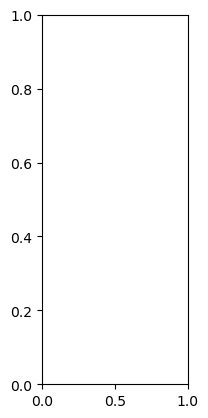

In [30]:
img = cv.imread("images/wood_planck.jfif")
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

th = cv.threshold(gray, 200, 255, cv.THRESH_BINARY_INV)[1]

#apply sobel kernel (wrong way)
sobely_8u = cv.Sobel(th, cv.CV_8U, 0, 1, ksize=3)


#right way
sobely_32f = cv.Sobel(th, cv.CV_32F, 0, 1, ksize=3)
sobely = cv.convertScaleAbs(sobely_32f)

plt.subplot(131), plt_img(th, "threshold")
plt.subplot(132), plt_img(sobely_8u, "cv.CV_8U")
plt.subplot(133), plt.img(sobely, "cv.CV_32F")
plt.show()

NameError: name 'plt_img' is not defined

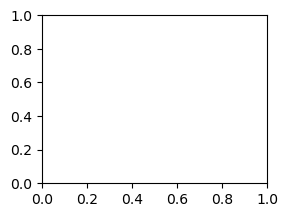

In [37]:
#combine both x and y direction to form gradient and orientation map
ing = cv.imread("images/chessboard.png", 0)

#sobel x and sobel y
sobelx = cv.Sobel(img, cv.CV_32F, 1, 0)
sobelx_8u = cv.convertScaleAbs(sobelx)
sobely = cv.Sobel(img, cv.CV_32F, 0, 1)
sobely_8u = cv.convertScaleAbs(sobely)

# combine x and y
gradient = cv.magnitude(sobelx, sobely)
direction = np.arctan(sobelx, sobely) * (180 / np.pi) % 180

plt.subplot(221), plt_img(sobelx_8u, "vertical edge")
plt.subplot(222), plt_img(sobely_8u, "horixontal edge")
plt.subplot(223), plt_img(gradient, cmap="jet"), plt.title("gradient"), plt.colorbar()
plt.subplot(224), plt.imshow(direction, cmap="jet"), plt.title("direction"),plt.colorbar()
                             
plt.show()

## Laplacian (second order) derivatives

In [39]:
img =cv.imread("images/lena.jfif", 0)

#blur
blur = cv.GaussianBlur(img, (5,5), 0)
LoG = cv.Laplacian(blur, cv.CV_16S)
LoG = cv.convertScaleAbs(LoG)

cv.imshow("grayscale", img)
cv.imshow("Log", LoG)
cv.waitKey(0)
cv.destroyAllWindows()

## Canny edge detector
- lower the number of false positives, enhance the edge detection
- Flexible

NameError: name 'plt_img' is not defined

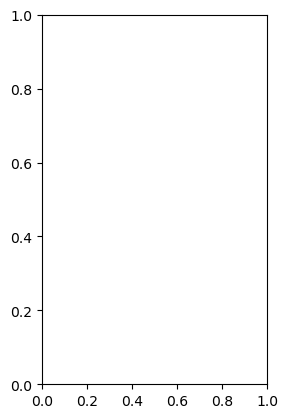

In [40]:
img = cv.imread("images/chair.jpg", 0) #0 = greyscale

edge = cv.Canny(img, 100, 300)

plt.subplot(121), plt_img(img, "grayscale")
plt.subplot(122), plt_img(edge, "canny")
plt.show()

NameError: name 'plt_img' is not defined

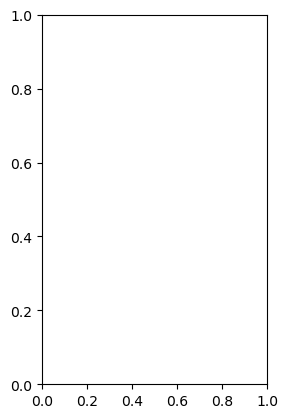

In [41]:
img = cv.imread("images/chair.jpg", 0) #0 = greyscale

edge = cv.Canny(img, 30, 150)

plt.subplot(121), plt_img(img, "grayscale")
plt.subplot(122), plt_img(edge, "canny")
plt.show()

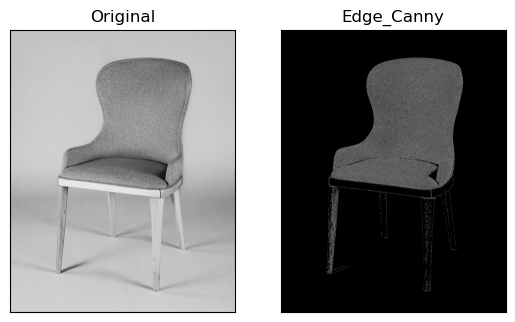

In [44]:
img = cv.imread("images/chair.jpg", 0) #0 = greyscale
edges = cv.Canny(img, 100, 200)
 
plt.subplot(121), plt.imshow(img, cmap='gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(122), plt.imshow(edges, cmap='gray')
plt.title('Edge_Canny'), plt.xticks([]), plt.yticks([])
plt.show()    

# Exercise
- create trackbar that control hysterisis thresholds and display resulting images from the changes in the thresholds

In [47]:
img = cv.imread("images/airplanes.jfif")
grey = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

wn = "Canny edge"
trackbarName = "low threshold"
ratio = 2.5
ksize = 3
img_copy = img.copy()

def cannyThresh(val):
    edge = cv.Canny(gray, val, ratio * val, apertureSize=ksize)
    
    #create color edge
    mask = edge != 0
    res = img * (mask[:, :, None].astype(np.uint8))
    cv.imshow(wn, res)
    
cv.namedWindow(wn)
cv.createTrackbar(trackbarName, wn, 0, 100, cannyThresh)

cv.waitKey(0)
cv.destroyAllWindows()

ValueError: operands could not be broadcast together with shapes (210,240,3) (183,275,1) 

ValueError: operands could not be broadcast together with shapes (210,240,3) (183,275,1) 

ValueError: operands could not be broadcast together with shapes (210,240,3) (183,275,1) 

ValueError: operands could not be broadcast together with shapes (210,240,3) (183,275,1) 

ValueError: operands could not be broadcast together with shapes (210,240,3) (183,275,1) 

ValueError: operands could not be broadcast together with shapes (210,240,3) (183,275,1) 

ValueError: operands could not be broadcast together with shapes (210,240,3) (183,275,1) 

ValueError: operands could not be broadcast together with shapes (210,240,3) (183,275,1) 

ValueError: operands could not be broadcast together with shapes (210,240,3) (183,275,1) 

ValueError: operands could not be broadcast together with shapes (210,240,3) (183,275,1) 

ValueError: operands could not be broadcast together with shapes (210,240,3) (183,275,1) 

ValueError: operands could not be broadcast together with shapes (210,240,3) (183,275,1) 

ValueError: operands could not be broadcast together with shapes (210,240,3) (183,275,1) 

ValueError: operands could not be broadcast together with shapes (210,240,3) (183,275,1) 

ValueError: operands could not be broadcast together with shapes (210,240,3) (183,275,1) 

In [51]:
#automatic canny
def canny_auto(img, method, sigma=0.33):
    """Args:
    imgL grayscale
    method: median, triangle and otsu
    sigma=0.33 (default)"""
    if method == "median":
        Th = np.median(img)
    
    elif method == "triangle":
        Th = cv.threshold(img, 0, 255, cv.THRESH_TRIANGLE)[0]
        
    elif method == "otsu":
        Th = cv.threshold(img, 0, 255, cv.THRESH_OTSU)[0]
        
    else:
        raise Exceotion("method specified not available!")
    
    lowThresh = (1-sigma) * Th
    highThresh = (1+sigma) * Th
    
    return cv.Canny(img, lowThresh, highThresh)

### Contours
Curve joining all points along the object boundary

In [54]:
rect = np.zeros((256, 256), dtype = np.uint8)

cv.rectangle(rect, (25, 25), (231, 231), 255, -1)

contours, _ = cv.findContours(rect, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

In [55]:
len(contours)

1

In [57]:
contours[0]

array([[[ 25,  25]],

       [[ 25, 231]],

       [[231, 231]],

       [[231,  25]]], dtype=int32)

In [65]:
rect_bgr = cv.cvtColor(rect, cv.COLOR_GRAY2BGR)
cv.drawContours(rect, contours, -1, (0, 255, 0), 2) #-1 = draw everything

cv.imshow("contour", rect_bgr)
cv.waitKey(0)
cv.destroyAllWindows()

In [70]:
img = cv.imread("images/monitor.jfif")
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

#Binary threshold
th = cv.threshold(gray, 200, 255, cv.THRESH_BINARY_INV)[1]

#find contours
contours, _ = cv.findContours(rect, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)

#draw contours
img_copy = img.copy()
cv.drawContours(img_copy, contours, -1, (0, 255,0), 1)
cv.imshow("contours", img_copy)
cv.waitKey(0)
cv.destroyAllWindows()

In [71]:
len(contours)

1

In [72]:
# one of the simply way: retain just the contours with largest number of points
length = [len(c) for c in contours]
cnt = contours[np.argmax(length)]

img_copy = img.copy()
cv.drawContours(img_copy, [cnt], -1, (0, 255,0), 1)
cv.imshow("contours", img_copy)
cv.waitKey(0)
cv.destroyAllWindows()

## Contour features
- centroid
- area
- perimeter
- bouding box

In [73]:
M = cv.moments(cnt)
print(M)

{'m00': 40804.0, 'm10': 5222912.0, 'm01': 5222912.0, 'm20': 807279937.3333333, 'm11': 668532736.0, 'm02': 807279937.3333333, 'm30': 138851115520.0, 'm21': 103331831978.66667, 'm12': 103331831978.66667, 'm03': 138851115520.0, 'mu20': 138747201.33333337, 'mu11': 1.1920928955078125e-07, 'mu02': 138747201.33333337, 'mu30': 3.0517578125e-05, 'mu21': 3.814697265625e-06, 'mu12': 3.814697265625e-06, 'mu03': 3.0517578125e-05, 'nu20': 0.08333333333333334, 'nu11': 7.159861508628846e-17, 'nu02': 0.08333333333333334, 'nu30': 9.073883892123686e-17, 'nu21': 1.1342354865154608e-17, 'nu12': 1.1342354865154608e-17, 'nu03': 9.073883892123686e-17}


In [74]:
cx = int(M['m10'] / M['m00'])
cy = int(M['m01'] / M['m00'])

print(f"The centriod of contour: {(cx, cy)}")

The centriod of contour: (128, 128)


In [78]:
area = cv.contourArea(cnt)
peri = cv.arcLength(cnt, True) # true =  want te contour to be closed
print(f"The area of contour: {area}")
print("The perimeter of contour: {}".format(round(peri, 3)))

The area of contour: 40804.0
The perimeter of contour: 808.0


## contour properties
$$aspect \ ratio = \frac{width}{height}$$

$$circularity =\frac{4 \times \pi \times A}{Perimeter^2} $$

In [83]:
img = cv.imread("images/remote-controller.webp")

cv.imshow("aircond controller", img)
cv.waitKey(0)
cv.destroyAllWindows()

In [84]:
#resize → grayscale → bilateral(reduce noise and maintain edge) → Canny → find contour ∞ contour feaatures
#sort the contour with respect to area in descending order
factor = 300 / img.shape[1] # shrinking.enlarge ratio
img = cv.resize(img, None, fx=factor, fy=factor)

grey = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

blur = cv.bilateralFilter(gray, 7, 19, 13)
edge = canny_auto(blur, method="triangle")

cv.imshow("edge", edge)
cv.waitKey(0)
cv.destroyAllWindows()

In [86]:
contours, _ = cv.findContours(edge, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)

cnts = sorted(contours, key=cv.contourArea, reverse=True)[:5]
screen = None
#rectangular contour
for c in cnts:
    peri = cv.arcLength(c, True)
    approx = cv.approxPolyDP(c, 0.1*peri, True)
    
    if len(approx) == 4:
        screen = c
        break

cv.drawContours(img_copy, [screen], -1, (0, 255, 0), 2)
cv.imshow("contour", img_copy)
cv.waitKey(0)
cv.destroyAllWindows()

In [95]:
#define the low and high threshold for red color in HSV color space
redLow1 = (0, 90, 40)
redHigh1 = (10, 255, 210)

redLow2 = (170, 90, 40)
redHigh2 = (179, 255, 210)

cap = cv.VideoCapture(0)

if not cap.isOpened():
    sys.exit("No webcam is detected!")

kernel = np.ones((3,3), dtype=np.uint8)
fixed_width = min_area = 500
factor = fixed_width / cap.get(3)       #frame width
    
while True:
    ret, frame = cap.read()
    
    if not ret:
        print("frame not received")
        break
        
    # resize -> blur -> HSV -> color inRange -> morphology
    resize = cv.resize(frame, None, fx=factor, fy=factor)
    blur = cv.GaussianBlur(resize, (5,5), 0)
    img_hsv = cv.cvtColor(blur, cv.COLOR_BGR2HSV)
    
    # color segmentation
    mask1 = cv.inRange(img_hsv, redLow1, redHigh1)
    mask2 = cv.inRange(img_hsv, redLow2, redHigh2)
    mask = cv.add(mask1, mask2)
    
    #morphological opening (remove noise)
    mask - cv.morphologyEx(mask, cv.MORPH_OPEN, kernel, iterations=2)
    
    #find contour
    contours= cv.findContours(mask, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
    cnt = contours[0]
    bbs = []
    
    # filter out smaller object and draw bounding box
    for c in cnts:
        area = cv.contourArea(c)
        if area > min_area:
            bb = cv.boundingRect(c)
            bbs.append(bb)
            
    for bb in bbs:
        x,y,w,h = bb
        cv.rectangle(resize, (x,y), (x+w, y+h), (0,255,0), 2)
        
    cv.imshow("red object", resize)
    k = cv.waitKey(1) & 0xFF
    if k == 27:
        break
    
cv.destroyAllWindows()
cap.release()

## Exercise
- Load the 'dice.jfif' and perform blob detection to detect as many pips on the dice as possible. You may use trackbar to find the best parameter settings.

In [36]:
image = cv.imread("images/dice.jfif")

#blob detector
param = cv.SimpleBlobDetector_Params()


# Filter by Area.
param.filterByArea = True

# Filter by Circularity
param.filterByCircularity = False

# Filter by Convexity
param.filterByConvexity = False

# Filter by Inertia (detect compact blobs)
param.filterByInertia = False

# Create a blob detector with the specified parameters
detector = cv.SimpleBlobDetector_create(param)

# Detect blobs
keypoints = detector.detect(image)

# Draw detected blobs as red circles
img_with_keypoints = cv.drawKeypoints(image, keypoints, outImage=None, color=(0, 0, 255), flags=cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

# Display the image with detected blobs
cv.imshow('Blobs Detected', img_with_keypoints)
cv.waitKey(0)
cv.destroyAllWindows()

## Activity
1. Experiment with different edge detectors: Sobel, Laplacian, Prewitt, Scharr derivatives and Canny operators (all with aperture size of 3) on image named 'pineapple.jfif'. Comment on the results.

2. Write a program to identify the white object (probably laptop) present in the image 'electronic.jfif'. Draw

3. Isolate the clock with the aid of edge detection and contours' properties. The example result should be as


In [52]:
# exercise 2
img = cv.imread("images/electronic.jfif")

# convert the image to HSV color space
hsv_img = cv.cvtColor(img, cv.COLOR_BGR2HSV)

# define lower and upper bounds of white color in HSV
lower_white = np.array([0, 0, 200])
upper_white = np.array([255, 30, 255])

# create a mask using the color threshold
mask = cv.inRange(hsv_img, lower_white, upper_white)

# find contours in the mask
contours, _ = cv.findContours(mask, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

# draw contours on the original image
if len(contours) > 0:
    max_contour = max(contours, key=cv.contourArea)
    cv.drawContours(img, [max_contour], -1, (0, 255, 0), 2)  # Draw green contour around the object


cv.imshow('White Object', img)
cv.waitKey(0)
cv.destroyAllWindows()

In [60]:
#exercise 3
img = cv.imread("images/clock.jpg")

# Convert the image to grayscale
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# Apply Canny edge detection
edges = cv.Canny(gray, threshold1=50, threshold2=150) #threshold1 and threshold 2 detect potential edges)

# Find contours
contours, _ = cv.findContours(edges, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

# Filter contours by area and aspect ratio (to narrow down to the clock)
clock_contours = []
for contour in contours:
    area = cv.contourArea(contour)
    x, y, w, h = cv.boundingRect(contour)
    aspect_ratio = w / float(h)
    
    if area > 500 and 0.8 < aspect_ratio < 1.2: #narrow down contours that likely correspond to the clock
        clock_contours.append(contour)

# Draw the green circle frame around the clock
for contour in clock_contours:
    (x, y), radius = cv.minEnclosingCircle(contour)
    center = (int(x), int(y))
    radius = int(radius)
    cv.circle(img, center, radius, (0, 255, 0), 2)  # Draw a green circle frame

# Display the image with the green circle frame
cv.imshow('Isolated Clock', img)
cv.waitKey(0)
cv.destroyAllWindows()